In [68]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import reciprocal, uniform
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [5]:
# df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)
# df

In [6]:
# df.columns

In [7]:
# X=df[['ATRIB_MED1', 'ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
#X

In [9]:
# X.info()

In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [11]:
# X.info()

In [12]:
# y = df['Perda30']

In [13]:
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

In [14]:
train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
test=pd.read_csv('baseProjetoTest.csv', index_col=0)

In [15]:
X_train = train[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [16]:
X_test = test[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [17]:
y_test = test['Perda30']

In [18]:
y_train = train['Perda30']

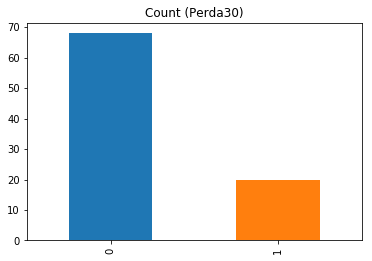

In [19]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

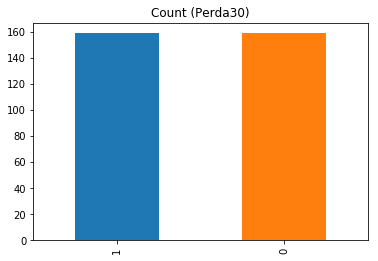

In [20]:
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<br>
## SGDClassifier

In [22]:
C = 5
alpha = 1 / (C * len(X_train))

In [23]:
steps = [('scaler', StandardScaler()),(('sgd_clf',  SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=100000, random_state=42)))]
pipeline = Pipeline(steps)
scaler = StandardScaler()

In [24]:
random_scaled = pipeline.fit(X_train, y_train)

In [25]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.6704545454545454

In [26]:
#y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [27]:
# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

In [28]:
# roc_auc_score(y_test, y_pred_prob)

Confusion matrix, without normalization


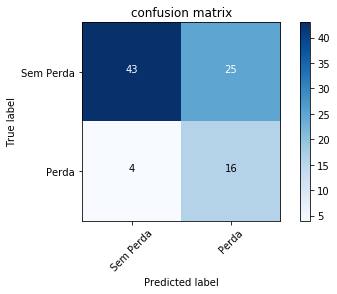

In [31]:
printcfm(y_test,y_pred,title='confusion matrix')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.63      0.75        68
          1       0.39      0.80      0.52        20

avg / total       0.80      0.67      0.70        88



<br>
## SVC

In [33]:
svm_clf = SVC(decision_function_shape="ovr")

In [34]:
#steps = [('scaler', StandardScaler()),(('svm_clf', SVC(decision_function_shape="ovr")))]
#pipeline = Pipeline(steps)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Fine-tunning the model.

In [35]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=100, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=6.923673292594463, gamma=0.006370245270341658 .................
[CV] .. C=6.923673292594463, gamma=0.006370245270341658, total=   0.0s
[CV] C=6.923673292594463, gamma=0.006370245270341658 .................
[CV] .. C=6.923673292594463, gamma=0.006370245270341658, total=   0.0s
[CV] C=6.923673292594463, gamma=0.006370245270341658 .................
[CV] .. C=6.923673292594463, gamma=0.006370245270341658, total=   0.0s
[CV] C=3.973015996509334, gamma=0.00415595033889989 ..................
[CV] ... C=3.973015996509334, gamma=0.00415595033889989, total=   0.0s
[CV] C=3.973015996509334, gamma=0.00415595033889989 ..................
[CV] ... C=3.973015996509334, gamma=0.00415595033889989, total=   0.0s
[CV] C=3.973015996509334, gamma=0.00415595033889989 ..................
[CV] ... C=3.973015996509334, gamma=0.00415595033889989, total=   0.0s
[CV] C=4.478879368874212, gamma=0.06621006399155266 ..................
[CV] ... C=4.4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=10.369615538229787, gamma=0.06583156290275814, total=   0.0s
[CV] C=10.369615538229787, gamma=0.06583156290275814 .................
[CV] .. C=10.369615538229787, gamma=0.06583156290275814, total=   0.0s
[CV] C=10.369615538229787, gamma=0.06583156290275814 .................
[CV] .. C=10.369615538229787, gamma=0.06583156290275814, total=   0.0s
[CV] C=10.946766631565405, gamma=0.046505219369132926 ................
[CV] . C=10.946766631565405, gamma=0.046505219369132926, total=   0.0s
[CV] C=10.946766631565405, gamma=0.046505219369132926 ................
[CV] . C=10.946766631565405, gamma=0.046505219369132926, total=   0.0s
[CV] C=10.946766631565405, gamma=0.046505219369132926 ................
[CV] . C=10.946766631565405, gamma=0.046505219369132926, total=   0.0s
[CV] C=4.469203041727082, gamma=0.0013789550115510887 ................
[CV] . C=4.469203041727082, gamma=0.0013789550115510887, total=   0.0s
[CV] C=4.469203041727082, gamma=0.0013789550115510887 ................
[CV] .

[CV] . C=5.9133510708054375, gamma=0.005869892241534328, total=   0.0s
[CV] C=5.9133510708054375, gamma=0.005869892241534328 ................
[CV] . C=5.9133510708054375, gamma=0.005869892241534328, total=   0.0s
[CV] C=5.9133510708054375, gamma=0.005869892241534328 ................
[CV] . C=5.9133510708054375, gamma=0.005869892241534328, total=   0.0s
[CV] C=5.191312417714399, gamma=0.010445414256603556 .................
[CV] .. C=5.191312417714399, gamma=0.010445414256603556, total=   0.0s
[CV] C=5.191312417714399, gamma=0.010445414256603556 .................
[CV] .. C=5.191312417714399, gamma=0.010445414256603556, total=   0.0s
[CV] C=5.191312417714399, gamma=0.010445414256603556 .................
[CV] .. C=5.191312417714399, gamma=0.010445414256603556, total=   0.0s
[CV] C=1.6846658359903568, gamma=0.006313880619048866 ................
[CV] . C=1.6846658359903568, gamma=0.006313880619048866, total=   0.0s
[CV] C=1.6846658359903568, gamma=0.006313880619048866 ................
[CV] .

[CV] .. C=2.433130534222941, gamma=0.001213766105071717, total=   0.0s
[CV] C=2.433130534222941, gamma=0.001213766105071717 .................
[CV] .. C=2.433130534222941, gamma=0.001213766105071717, total=   0.0s
[CV] C=8.338490372832954, gamma=0.03384148509125222 ..................
[CV] ... C=8.338490372832954, gamma=0.03384148509125222, total=   0.0s
[CV] C=8.338490372832954, gamma=0.03384148509125222 ..................
[CV] ... C=8.338490372832954, gamma=0.03384148509125222, total=   0.0s
[CV] C=8.338490372832954, gamma=0.03384148509125222 ..................
[CV] ... C=8.338490372832954, gamma=0.03384148509125222, total=   0.0s
[CV] C=4.877920981538661, gamma=0.0011304258590317268 ................
[CV] . C=4.877920981538661, gamma=0.0011304258590317268, total=   0.0s
[CV] C=4.877920981538661, gamma=0.0011304258590317268 ................
[CV] . C=4.877920981538661, gamma=0.0011304258590317268, total=   0.0s
[CV] C=4.877920981538661, gamma=0.0011304258590317268 ................
[CV] .

[CV] .. C=9.681989531101582, gamma=0.002385348377871359, total=   0.0s
[CV] C=7.903279966834703, gamma=0.03094281824451044 ..................
[CV] ... C=7.903279966834703, gamma=0.03094281824451044, total=   0.0s
[CV] C=7.903279966834703, gamma=0.03094281824451044 ..................
[CV] ... C=7.903279966834703, gamma=0.03094281824451044, total=   0.0s
[CV] C=7.903279966834703, gamma=0.03094281824451044 ..................
[CV] ... C=7.903279966834703, gamma=0.03094281824451044, total=   0.0s
[CV] C=9.748047960446328, gamma=0.006374621291241234 .................
[CV] .. C=9.748047960446328, gamma=0.006374621291241234, total=   0.0s
[CV] C=9.748047960446328, gamma=0.006374621291241234 .................
[CV] .. C=9.748047960446328, gamma=0.006374621291241234, total=   0.0s
[CV] C=9.748047960446328, gamma=0.006374621291241234 .................
[CV] .. C=9.748047960446328, gamma=0.006374621291241234, total=   0.0s
[CV] C=3.6282389180239307, gamma=0.030806143851386514 ................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.6s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002295C80DBA8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002295C80DC50>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
rnd_search_cv.best_estimator_

SVC(C=8.327179372209839, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.09309660202987337,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
rnd_search_cv.best_score_

0.8427672955974843

In [38]:
param_grid = [
        #{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
         {'kernel': ['poly','rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
         'degree': [2, 3, 4, 5 ,6],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0],
         'probability' : [True]},
    ]
grid_search_cv = GridSearchCV(svm_clf, param_grid, verbose=3, n_jobs=-1)
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    7.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['poly', 'rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'degree': [2, 3, 4, 5, 6], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0], 'probability': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [39]:
grid_search_cv.best_estimator_

SVC(C=300.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
grid_search_cv.best_score_

0.9213836477987422

In [41]:
final_model = grid_search_cv.best_estimator_
# final_model = SVC(C=300.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=2, gamma=1, kernel='rbf',
#   max_iter=-1, probability=True, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)
# final_model.fit(X_train_scaled,y_train)

In [42]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, verbose=3, n_jobs=-1)
print(cv_scores)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s


[0.95 0.95 0.94 0.92 0.87]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


## Predicting the Classes in Trainning Set

In [43]:
y_pred = final_model.predict(X_train_scaled)

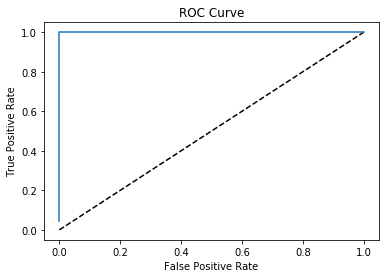

In [44]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [45]:
roc_auc_score(y_train, y_pred_prob)

1.0

Confusion matrix, without normalization


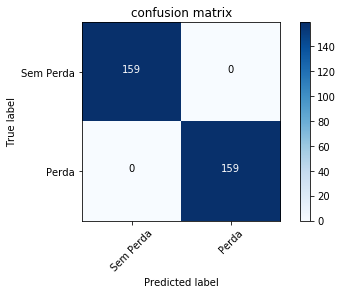

In [47]:
printcfm(y_train,y_pred,title='confusion matrix')

## Evaluating the model with Cross-Validation

In [48]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [49]:
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [50]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


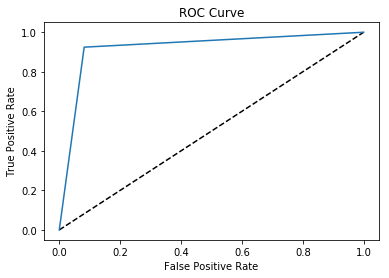

In [51]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [52]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.9213836477987422

Confusion matrix, without normalization


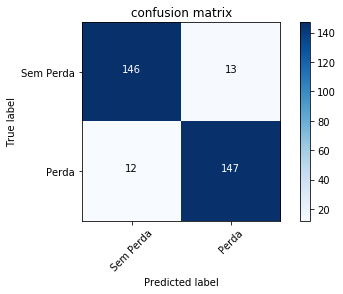

In [55]:
printcfm(y_train,y_train_pred,title='confusion matrix')

In [56]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92       159
          1       0.92      0.92      0.92       159

avg / total       0.92      0.92      0.92       318



## Precision/Recall Tradeoff

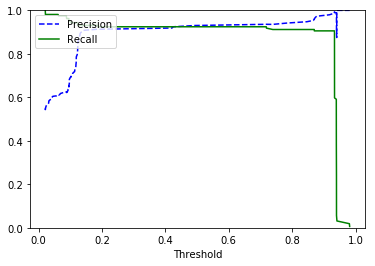

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [58]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.94 0.92 0.91]
0.9213836477987423


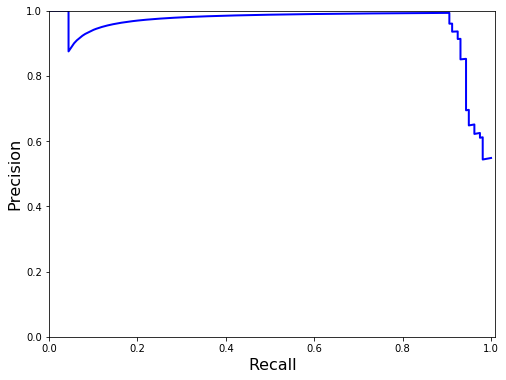

In [59]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## Predicting the Classes in Test Set

In [60]:
y_pred = final_model.predict(X_test_scaled)

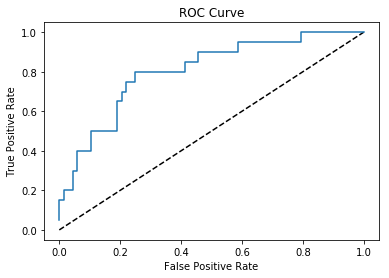

In [61]:
y_pred_prob = final_model.predict_proba(X_test_scaled)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [62]:
roc_auc_score(y_test, y_pred_prob)

0.8036764705882352

Confusion matrix, without normalization


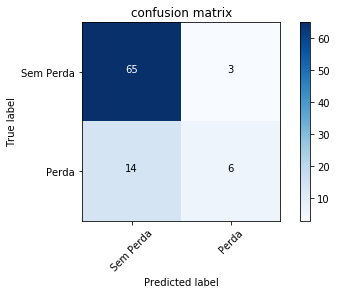

In [63]:
printcfm(y_test,y_pred,title='confusion matrix')

In [65]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.96      0.88        68
          1       0.67      0.30      0.41        20

avg / total       0.79      0.81      0.78        88



In [66]:
X=np.concatenate((X_train_scaled,X_test_scaled),axis=0)
# print(X)
y=np.append(y_train,y_test)
# print(y)

Automatically created module for IPython interactive environment


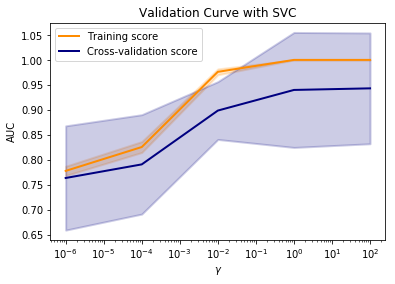

In [78]:
print(__doc__)

param_range = np.logspace(-6, 2, 5)

train_scores, test_scores = validation_curve(
    final_model, X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("$\gamma$")
plt.ylabel("AUC")
#plt.ylim(0.0, 1.1)
#plt.xlim(-1, 22)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
param_range = np.logspace(-6, 20, 20)

viz = ValidationCurve(
    final_model, param_name="gamma", param_range=param_range,
    logx=True, cv=10, scoring="precision", n_jobs=-1,
)

viz.fit(X, y)
viz.poof()

# Add learning curves